In [1]:
# Loading required libraries
import numpy as np
import pandas as pd
import re, os
from math import log2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics # For 3 external cluster validity measures
from sklearn.datasets import fetch_20newsgroups # Loading 20-Newsgroup dataset

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
# Common Punctuations
punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Stop words consolidated list taken from sklearn.feature_extraction + nltk stop_words + single letter words (a to z)
stop_words=['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'c',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'e',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'f',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'found',
 'four',
 'from',
 'front',
 'full',
 'further',
 'g',
 'get',
 'give',
 'go',
 'h',
 'had',
 'has',
 'hasnt',
 'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'ie',
 'if',
 'in',
 'inc',
 'indeed',
 'interest',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'j',
 'k',
 'keep',
 'l',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 'ltd',
 'm',
 'made',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mill',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'n',
 'name',
 'namely',
 'neither',
 'never',
 'nevertheless',
 'next',
 'nine',
 'no',
 'nobody',
 'none',
 'noone',
 'nor',
 'not',
 'nothing',
 'now',
 'nowhere',
 'o',
 'of',
 'off',
 'often',
 'on',
 'once',
 'one',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'p',
 'part',
 'per',
 'perhaps',
 'please',
 'put',
 'q',
 'r',
 'rather',
 're',
 's',
 'same',
 'see',
 'seem',
 'seemed',
 'seeming',
 'seems',
 'serious',
 'several',
 'she',
 'should',
 'show',
 'side',
 'since',
 'sincere',
 'six',
 'sixty',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 'system',
 't',
 'take',
 'ten',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'thick',
 'thin',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 'toward',
 'towards',
 'twelve',
 'twenty',
 'two',
 'u',
 'un',
 'under',
 'until',
 'up',
 'upon',
 'us',
 'v',
 'very',
 'via',
 'w',
 'was',
 'we',
 'well',
 'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'x',
 'y',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'z']

In [3]:
## 20 NEWS GROUP DATASET

## 20 Newsgroup dataset with headers_footers_quotes (1st variant)
# mydata= fetch_20newsgroups(subset='all', shuffle=True)

## 20 Newsgroup dataset without headers_footers_quotes (2nd variant)
mydata= fetch_20newsgroups(subset='all', shuffle=True, remove = ('headers', 'footers', 'quotes'))

# target_names are the true labels 
groups = mydata['target_names']
groups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
no_of_docs = len(mydata['data'])
true_k_value = len(groups)
no_of_docs, true_k_value

(18846, 20)

In [5]:
labels, no_of_groups= np.unique(mydata.target, return_counts=True)
no_of_groups

array([799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984,
       990, 987, 997, 910, 940, 775, 628], dtype=int64)

In [6]:
# 20 Newsgroup
# Making a pandas dataframe columns with data:text files and target:ground truth labels
mydata_df = pd.DataFrame({'data':mydata.data,'target': mydata.target})

# displaying the first 5 rows of the dataframe - before pre-processing
mydata_df.head()

,data,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [7]:
# Display the total number of words in all text documents
total_no_of_words = [len(mydata_df['data'][i].split()) for i in range(len(mydata_df))]
sum(total_no_of_words)

3423145

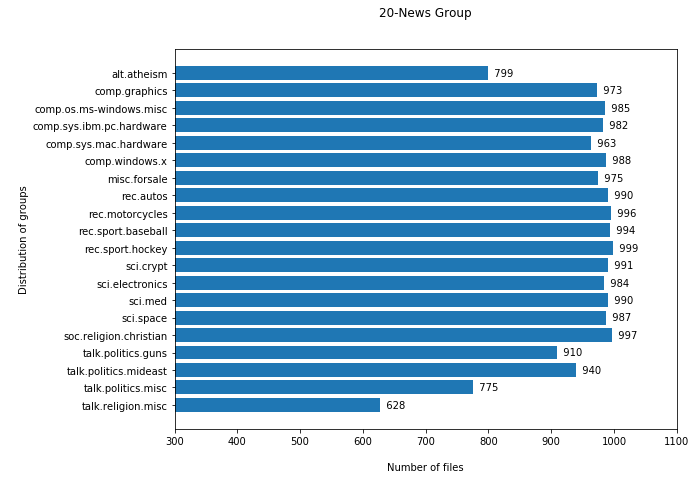

In [8]:
# 20 News group - Horizontal Plot - Distribution of 20 groups
plt.rcParams['figure.figsize'] = [9, 7]
fig, axes = plt.subplots()
axes.barh(groups,no_of_groups)
axes.set_yticks(groups)
axes.set_yticklabels(groups)
axes.invert_yaxis()  # labels read top-to-bottom
axes.set_xlabel('\nNumber of files')
axes.set_ylabel('\nDistribution of groups')
axes.set_xlim(300,1100)
axes.set_title('20-News Group\n').set_position([.5, 1.03])
for i, v in enumerate(no_of_groups):
    axes.text(v, i,str('  ')+str(v),verticalalignment='center')
plt.show()

In [39]:
# Reuters dataset
# Replace below folder path  # folders with subfolders(i.e. groups)
# reads main_folder which contains subfolders(i.e groups/true classes)

main_folder = "E:/Bals/Study plan/Lectures_Tutorials/Diploma Thesis/MAN0122/Text_Clustering_MAN0122/Text_Clustering/reuters"  
mydata_df = pd.DataFrame(columns=['data','target'])
files_path = os.listdir(main_folder)
files_ = []
target = []
for i in files_path:
    for files in os.listdir(main_folder+"/"+i+"/"):
        with open(os.path.join(main_folder+"/"+i+"/"+files)) as f:
            data = f.read()
            files_.append(data)
            target.append(files_path.index(i))

mydata_df['data']   = files_
mydata_df['target'] = target
mydata_df.head()

,data,target
0,\n\nCOMPUTER TERMINAL SYSTEMS <CPML> COMPLETES...,0
1,\n\nOHIO MATTRESS <OMT> MAY HAVE LOWER 1ST QTR...,0
2,\n\nMCLEAN'S <MII> U.S. LINES SETS ASSET TRANS...,0
3,\n\nCHEMLAWN <CHEM> RISES ON HOPES FOR HIGHER ...,0
4,\n\n<COFAB INC> BUYS GULFEX FOR UNDISCLOSED AM...,0


In [40]:
no_of_docs = len(mydata_df['data'])
true_k_value = max(mydata_df['target']) + 1 # since target list starts from 0
no_of_docs, true_k_value

(12897, 80)

In [41]:
labels, no_of_groups= np.unique(mydata_df.target, return_counts=True)
no_of_groups

array([2369,   57,   51,  105,   66,    2,   72,    6,    6,  126,   60,
          1,  205,   42,    1,   91,    4,  552,    2,  169,    3, 3926,
         15,   22,  101,  109,  295,    5,    1,   10,   16,   18,   13,
          6,  453,   48,   46,    3,   52,    5,   18,   14,   24,   15,
         25,  362,  152,    1,   39,    4,    1,   62,   23,    1,   25,
         21,    4,    5,    2,    1,    3,   53,   20,    1,   40,  151,
          4,    6,    3,   15,  123,    1,    5,   27,  330, 2110,   30,
         23,    6,   13], dtype=int64)

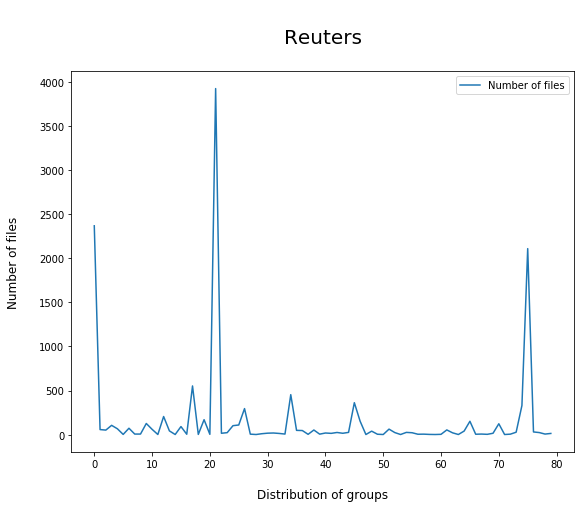

In [42]:
## Reuters dataset line plot
plt.rcParams['figure.figsize'] = [9, 7]
plt.plot(no_of_groups,label="Number of files")
plt.title("\nReuters\n", fontsize=20)
plt.ylabel('Number of files\n', fontsize=12)
plt.xlabel('\nDistribution of groups', fontsize=12)
plt.legend()
plt.show()

In [43]:
# Display the total number of words in all text documents
total_no_of_words = [len(mydata_df['data'][i].split()) for i in range(len(mydata_df))]
sum(total_no_of_words)

1728786

In [9]:
## Pre-processing lambda functions
# Makes alpha numeric words as one
alphanumeric    = lambda words: re.sub(r"""\w*\d\w*""", ' ', words)

# Removes '\n' all new lines
remove_n_line   = lambda words: words.translate(str.maketrans('\n', ' '))

# Removes '\t' all tabs
remove_t_line   = lambda words: words.translate(str.maketrans('\t', ' '))

# Removes all extra white spaces
remove_e_spaces = lambda words: re.sub(' +', ' ', words)

# Removes all white spaces at the start of a string
remove_f_spaces = lambda words: re.sub('^ ', '', words)

# Removes all white spaces at the end of a string
remove_l_spaces = lambda words: re.sub(' $', '', words)

# Removes all punctuations 
punc            = lambda words: re.sub('[%s]' % re.escape(punctuations), ' ', words.lower())

# Removes all stop words
remove_stop_w   = lambda words: re.compile(r'\b('+'|'.join(stop_words)+r')\b', flags=re.IGNORECASE).sub("", words)

## Uses Porter Stemmer  # Uncomment If stemming(Porter) needed
# stems         = lambda words: stemming.stem(words)  

# Uses WordNet Lemmatization  # Uncomment if Lemmatization(Wordnet) needed
lemmas          = lambda words: lemmatizer.lemmatize(words)    

In [10]:
# Running 2 to 3 times gives clean data
# mydata_df_ = mydata_df # Uncomment if reuters needed
mydata_df['data'] = mydata_df.data.map(alphanumeric)
mydata_df['data'] = mydata_df.data.map(remove_n_line)
mydata_df['data'] = mydata_df.data.map(remove_t_line)
mydata_df['data'] = mydata_df.data.map(remove_e_spaces)
mydata_df['data'] = mydata_df.data.map(remove_f_spaces)
mydata_df['data'] = mydata_df.data.map(remove_l_spaces)
mydata_df['data'] = mydata_df.data.map(punc)
mydata_df['data'] = mydata_df.data.map(remove_stop_w)
mydata_df['data'] = mydata_df.data.map(lemmas) 

In [11]:
# Displaying the first 5 rows of the dataframe - after pre-processing
mydata_df.head()

,data,target
0,sure bashers pens fans pretty confused ...,10
1,brother market high performance video ca...,3
2,finally said dream mediterranean ne...,17
3,think scsi card doing dma transfers dis...,3
4,old jasmine drive use new underst...,4


In [12]:
# Convert text data into tfidf matrix
vectorizer = TfidfVectorizer(lowercase=True,use_idf=True,smooth_idf=False,sublinear_tf=False, stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(mydata_df.data) #.astype('float32')
# tfidf matrix shape will give the exact amount of unique words
tfidf_matrix.shape, type(tfidf_matrix), tfidf_matrix.dtype

((18846, 87175), scipy.sparse.csr.csr_matrix, dtype('float64'))

In [13]:
## Reducing Sparse TFIDF matrix into 1000 terms using TruncatedSVD
tsvd = TruncatedSVD(n_components=1000)
N_terms = tsvd.fit_transform(tfidf_matrix)
N_terms.shape, type(N_terms), N_terms.dtype

((18846, 1000), numpy.ndarray, dtype('float64'))

In [ ]:
## Reducing Sparse TFIDF matrix into 100 terms using TruncatedSVD
tsvd = TruncatedSVD(n_components=100)
N_terms = tsvd.fit_transform(tfidf_matrix)
N_terms.shape, type(N_terms), N_terms.dtype

In [14]:
class KMeans:
    def __init__(self, k, buckshot_centroids=None, max_iteration=100):
        self.k = k
        self.max_iteration = max_iteration
        self.buckshot_centroids = None

    def init_centroids(self, data_matrix):
        if self.buckshot_centroids != None:
            self.centroids = data_matrix[self.buckshot_centroids]
        else:
            init_centroids = np.random.permutation(data_matrix.shape[0])[:self.k]
            self.centroids = data_matrix[init_centroids]
        return self.centroids

    def return_clusters(self, data_matrix):
        dist_from_centroid = metrics.pairwise_distances(data_matrix, self.centroids, metric='euclidean')
        self.cluster_ids = np.argmin(dist_from_centroid, axis=1)
        return self.cluster_ids

    def reassign_centroids(self, data_matrix):
        self.centroids = np.array([data_matrix[self.cluster_ids == i].mean(axis=0) for i in range(self.k)])
        return self.centroids
    
    # Main function
    def perform_kmeans(self, data_matrix):
        self.centroids = self.init_centroids(data_matrix)
        for iterations in range(self.max_iteration):
            self.cluster_ids = self.return_clusters(data_matrix)
            self.centroids = self.reassign_centroids(data_matrix)
        return self
    
    # Returns 1d numpy array with predicted labels
    def predictions(self, data_matrix):
        return self.return_clusters(data_matrix)

In [15]:
kmeans = KMeans(k=20)
km = kmeans.perform_kmeans(N_terms)
predictions = km.predictions(N_terms)
# Displays the predicted cluster id list/array
predictions

array([19, 11, 13, ..., 11,  6,  6], dtype=int64)

In [16]:
# Makes a dataframe column for predicted lables
mydata_df['predictions'] = predictions
# Displays a dataframe of 10 rows with columns data, target, predictions
mydata_df.head(10)

,data,target,predictions
0,sure bashers pens fans pretty confused ...,10,19
1,brother market high performance video ca...,3,11
2,finally said dream mediterranean ne...,17,13
3,think scsi card doing dma transfers dis...,3,15
4,old jasmine drive use new underst...,4,15
5,high school worked lab assistant bunch ...,12,11
6,ae dallas try tech support ...,4,11
7,stuff deleted ok solution problem c...,10,19
8,yeah second believe price ve tryi...,10,6
9,christian means believes divinity jesus...,19,18


In [17]:
# Makes tuple of pairs list with true_labels,pred_lables
targ_list = mydata_df['target'].tolist() # makes a dataframe columns into list
pred_list = mydata_df['predictions'].tolist() # makes a dataframe columns into list
pairs_list = [(targ_list[i],pred_list[i]) for i in range(len(targ_list))]

# Assigning new variables for calculating validity measures
true_groups = targ_list ##
pred_groups = pred_list

In [20]:
## Functions for calculating cluster validation scores

# Function for calculating homogeneity score
def hm_scores(true_groups, pred_groups):
    hm = metrics.homogeneity_score(true_groups, pred_groups)
    return hm 

# Function for calculating completeness score
def cp_scores(true_groups, pred_groups):
    cp = metrics.completeness_score(true_groups, pred_groups)
    return cp

# Function for calculating v-measure 
def vm_scores(true_groups, pred_groups):
    vm = metrics.v_measure_score(true_groups, pred_groups)
    return vm

# Main validity measure function
def measures(clusters_range=20): ## clusters_range positional argument for x axis plot:number of clusters # i.e 80 for reuters dataset
    # returns 4 lists, where:
    # x: number of clusters
    # y: hm_list, cp_list, vm_list
    plots_x = list(range(2,clusters_range+1)) # x-axis starts from 2
    plots_y_hm=[]
    plots_y_cp=[] 
    plots_y_vm=[]

    for i in range(2,clusters_range+1):
        kmeans = KMeans(k=i)
        km = kmeans.perform_kmeans(N_terms)
        predictions = km.predictions(N_terms)
        plots_y_hm.append(hm_scores(true_groups,predictions))
        plots_y_cp.append(cp_scores(true_groups,predictions))
        plots_y_vm.append(vm_scores(true_groups,predictions))
    return plots_x, plots_y_hm, plots_y_cp, plots_y_vm

# plotting measures using the main function
def plot_measures():
    plots_x, plots_y_hm, plots_y_cp, plots_y_vm = measures()
    plt.rcParams['figure.figsize'] = [9, 7]
    plt.plot(plots_x, plots_y_hm, marker='o',color="blue", label="Homogeneity")
    plt.plot(plots_x, plots_y_cp, marker='o',color="green", label="Completeness")
    plt.plot(plots_x, plots_y_vm, marker='o',color="red", label="V-Measures")
#     plt.plot(plots_x, plots_y_hm, color="blue", label="Homogeneity") # for reuters
#     plt.plot(plots_x, plots_y_cp, color="green", label="Completeness") # for reuters
#     plt.plot(plots_x, plots_y_vm, color="red", label="V-Measures") # for reuters
    plt.xlabel("\nNumber of Clusters",size="large")
    plt.xticks(range(0,24,2))
#     plt.xticks(range(0,82,5)) # for reuters
    plt.yticks(np.arange(0,0.7,0.1))
    plt.grid()
    plt.legend()
#     plt.title("\n20 News group (1st variant)- Kmeans with 100 terms\n",size="x-large")
#     plt.title("\n20 News group (2nd variant)- Kmeans with 100 terms\n",size="x-large")
#     plt.title("\nReuters - Kmeans with 100 terms\n",size="x-large")
    plt.ylabel("\nMetric values\n",size="large")
    plt.show()

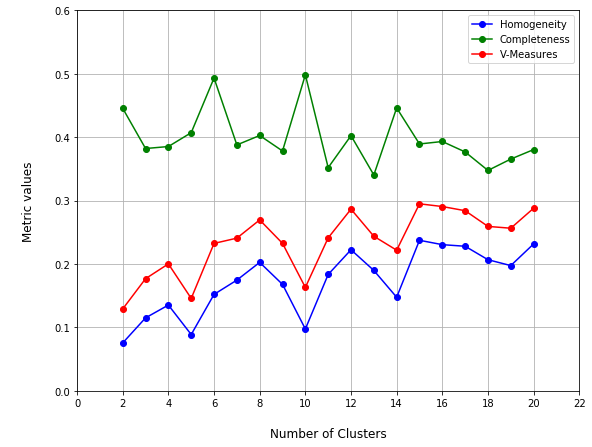

In [24]:
# Plots everytime differ - takes some time
plot_measures()

In [25]:
# Function to calculate entropy based on pairs_list(true_lables,predicted_lables)
def calculate_entropy(pairs_list):
    entropy = []
    for i in range(len(pairs_list)):
        for j in range(len(pairs_list[i])):
            count = pairs_list.count((i,j))
            if count > 0:
                p_ij = count / no_of_docs
                entropy.append(p_ij *log2(p_ij))
    return -sum(entropy)

# Function to calculate purity based on pairs_list
def calculate_purity(pairs_list):
    confusion_matrix = np.zeros((len(no_of_groups),len(no_of_groups)))
    purity = []
    for i in range(len(pairs_list)):
        confusion_matrix[pairs_list[i][0]][pairs_list[i][1]] = confusion_matrix[pairs_list[i][0]][pairs_list[i][1]]+1
    for j in confusion_matrix:
        purity.append(max(j))
    return (sum(purity))/(no_of_docs)

In [26]:
# Displays the entropy and purity for k-clusters
calculate_entropy(pairs_list), calculate_purity(pairs_list)

(0.0015071602173801464, 0.6159397219569139)

In [27]:
# Function to calculate cosine similarity between two documents
def cosine(a,b):
    dot_prod = np.dot(a,b)
    mod_a_b = np.linalg.norm(a) * np.linalg.norm(b)
    cs = dot_prod/mod_a_b
    return cs

# Function to create similarity matrix for Buckshot
def similarity_matrix(k):
    global sample_subset, doc_list
    sample_subset = round((no_of_docs * k)**0.5)  #i.e  √kn
    doc_list = np.random.permutation(no_of_docs)[:sample_subset]
    s_mat = np.zeros((sample_subset,sample_subset))
    for i in range(sample_subset):
        for j in range(sample_subset):
            s_mat[i][j] = cosine(N_terms[doc_list[i]],N_terms[doc_list[j]])
    return s_mat

In [28]:
## Similarity matrix creation for buckshot
k = 20 # for 20 news group's true k value
# k = 80 # for reuters's true k value
sim_matrix = similarity_matrix(k)
sim_matrix.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


(614, 614)

In [29]:
from copy import deepcopy

# Creates a dictionary object with doc_ids and its distances
class Compute_distance_dict:
    def __init__(self, np_array):
        self.np_array = np_array
        self.distances = {}

        if self.np_array.shape[0] == self.np_array.shape[1]:
            length = self.np_array.shape[0]
            self.np_array = np_array
            self.distances = {}
            length = length - 1
            self.docs = [str(i) for i in range(length+1)]
            self.np_array = np.delete(np_array, 0, 0)

            for i in range(length):
                self.distances[str(i+1)] = {str(j): float(self.np_array[i][j]) for j in range(i + 1)}
#             print(self.distances)
            # Removing numpy array from memory to save space
            del self.np_array
        else:
            print("Array's shape should be n*n, not {}*{}".format(self.np_array.shape[0],self.np_array.shape[1]))
            print("Stopped execution !")

    def nearest(self):
        if len(self.docs) < 2:
            return None
        curr_nearest = None
        curr_a = None
        curr_b = None
        for a, bs in self.distances.items():
            for b, dist in bs.items():
                if curr_nearest is None or \
                            dist < curr_nearest:
                    curr_nearest = dist
                    curr_a = a
                    curr_b = b
        return (curr_a, curr_b)

    def distance(self, a, b):
        if a in self.distances:
            if b in self.distances[a]:
                return self.distances[a][b]
        if b in self.distances:
            if a in self.distances[b]:
                return self.distances[b][a]
        return None

    def to_trees(self):
        new_distances = {}
        for a in self.distances:
            new_a = Tree((a,), 0)
            new_distances[new_a] = {}
            for b in self.distances[a]:
                new_b = Tree((b,), 0)
                new_distances[new_a][new_b] = self.distances[a][b]
        self.distances = new_distances

        new_docs = []
        for o in self.docs:
            new_docs.append(Tree((o,), 0))
        self.docs = new_docs

    def _get_n_trees(self):
        return len(self.distances) + 1

    
class Tree(object):
    def __init__(self, id, depth, parent=None, children=None):
        self.id = id
        self.parent = parent
        self.children = children
        self.depth = depth

    def __repr__(self):
        return '(%s %f)' % (self.id, self.depth)

    def __key(self):
        return (self.id, self.depth)

    def __eq__(x, y):
        return type(x) == type(y) and x.__key() == y.__key()

    def __hash__(self):
        return hash(self.__key())

# Class for HAC initialzed with dist obj from distance_dict
class HAC:
    def __init__(self, dist_obj):
        self.dist_obj = dist_obj
        self.temp_dist_obj = deepcopy(dist_obj)
        self.temp_dist_obj.to_trees()
        self.clusters = deepcopy(self.temp_dist_obj.docs)

        while 1:
            trees = self.temp_dist_obj.nearest()
            if trees is None:
                break
            self._merge(trees[0], trees[1])

    # Performs hac with group average linkage
    def _grp_avg__linkage(self, a, b):
        sum = 0
        n_docs = 0
        for docs_a in a.id:
            for docs_b in b.id:
                sum += self.dist_obj.distance(docs_a, docs_b)
                n_docs += 1
        return sum / n_docs         

    # merges two doc ids based on their distance
    def _merge(self, a, b):
        c = Tree(a.id + b.id, self.temp_dist_obj.distance(a, b) * 0.5,
                 children=(a, b))
        self._cluster_parent(a, c)
        self._cluster_parent(b, c)
        self.temp_dist_obj.docs.remove(a)
        self.temp_dist_obj.docs.remove(b)
        self.clusters.append(c)

        if a in self.temp_dist_obj.distances:
            del self.temp_dist_obj.distances[a]
        if b in self.temp_dist_obj.distances:
            del self.temp_dist_obj.distances[b]

        for x, ys in self.temp_dist_obj.distances.items():
            if a in ys:
                del ys[a]
            if b in ys:
                del ys[b]

        merged = []
        for x in self.temp_dist_obj.distances:
            self.temp_dist_obj.distances[x][c] = self._grp_avg__linkage(x, c)
            merged.append(x)

        self.temp_dist_obj.distances[c] = {}

        for x in self.temp_dist_obj.docs:
            if x not in merged:
                self.temp_dist_obj.distances[c][x] = self._grp_avg__linkage(x, c)

        if len(self.temp_dist_obj.distances[c]) == 0:
            del self.temp_dist_obj.distances[c]

        self.temp_dist_obj.docs.append(c)

# assigns a base parent to all list of clusters
    def _cluster_parent(self, child, parent):
        for n in self.clusters:
            if n == child:
                n.parent = parent

    def _doc_ids(self, l):
        ret_docids = [tree.id for tree in l]
        return ret_docids

    def _clusters(self):
        list_of_clusters = [clust for clust in self.clusters if clust.children is None]
        return list_of_clusters

    def no_of_clusters(self, n):
        if n <= 0:
            return None
        return_clusters = self._clusters()

        while len(return_clusters) > n:
            # find the parent with the smallest heirarchy
            lowest = None
            for tree in return_clusters:
                if tree.parent.children[0] in return_clusters and \
                                tree.parent.children[1] in return_clusters:
                    if lowest is None:
                        lowest = tree.parent
                    elif tree.parent.depth < lowest.depth:
                        lowest = tree.parent
            return_clusters.remove(lowest.children[0])
            return_clusters.remove(lowest.children[1])
            return_clusters.append(lowest)

        return self._doc_ids(return_clusters)

In [32]:
dis_mat = Compute_distance_dict(sim_matrix)
hac = HAC(dis_mat)
# hac.no_of_clusters(20)

In [34]:
## Assigns list of new centroids
new_centroids = hac.no_of_clusters(20) # for 20 news group


In [35]:
# Assigning new centroids to their respective document ids to calculate better centroids
_new_centroids = [doc_list[int(new_centroids[i][0])] for i in range(len(new_centroids))] 
# _new_centroids

In [36]:
# Assigning new cnetorids to kmeans ( i.e: last step of buckshot algorithm )
kmeans = KMeans(k=20, buckshot_centroids=_new_centroids)
km = kmeans.perform_kmeans(N_terms)
predictions = km.predictions(N_terms)
# Displays the predicted cluster id list/array
predictions

array([0, 6, 5, ..., 2, 9, 2], dtype=int64)

In [37]:
# Makes tuple of pairs list with true_labels,pred_lables
mydata_df['predictions'] = predictions
targ_list = mydata_df['target'].tolist() # makes a dataframe columns into list
pred_list = mydata_df['predictions'].tolist() # makes a dataframe columns into list
pairs_list = [(targ_list[i],pred_list[i]) for i in range(len(targ_list))]

# Assigning new variables for calculating validity measures
true_groups = targ_list ##
pred_groups = pred_list

In [38]:
calculate_entropy(pairs_list), calculate_purity(pairs_list)

(0.160726020568489, 0.5825108776398175)